In [1]:
!pip install opendatasets pandas

In [2]:
import opendatasets as od

od.download('https://www.kaggle.com/datasets/yasserh/housing-prices-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akshadaKashyap7348
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset


100%|██████████| 4.63k/4.63k [00:00<00:00, 12.2MB/s]

In [3]:
import pandas as pd

file = ('/content/housing-prices-dataset/Housing.csv')
newData = pd.read_csv(file)
newData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Step 1: Understanding the Problem and the Data

1.   What is the business goal or research question?: perform EDA on housing price dataset to understand all the relationships among the variables, vulnerabilities of the dataset, and how it can be used for further machine learning use cases.
2.   What are the variables in the data and what do they represent?: let's find out





In [4]:
newData.info()

# good to note from the output that none of the rows have missing data! (non-null count is 0 for everything)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
newData.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [6]:
dimensions = newData.shape
no_of_rows = dimensions[0]
no_of_cols = dimensions[1]

print(f"no. of rows: {no_of_rows}")
print(f"no. of columns: {no_of_cols}")

no. of rows: 545
no. of columns: 13


## using newData.info()

*   we get the following information about the dataset: area, types of rooms and how many there are, hotwaterheating?, airconditioning?, parking?, furnishing?, no. of stories, mainroad-facing (?)



3.   What types of data (numerical, categorical, text, etc.) do you have?: some are boolean, some are integer values; furnished is {furnished, self-furnished} (could be one-hot encoded)

In [7]:
# getting a statistical summary of the data

newData.describe()

# all values that are not int are not returned here...

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
newData.nunique()

# most of them not being unique makes sense - more than half the variables are non-int, and values like bedrooms, bathrooms, etc. !>5-6...

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


# step 2: one hot encoding

In [9]:
X = newData.drop("price", axis=1)
y = newData["price"]

In [10]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns

print("Numerical columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))


Numerical columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [11]:
print("\n\nCategorical value counts:")
for col in cat_cols:
    print(f"\n{col}:")
    print(newData[col].value_counts())



Categorical value counts:

mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64

guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64

basement:
basement
no     354
yes    191
Name: count, dtype: int64

hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64

prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64

furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [12]:
# Create the preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Create transformers
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ]
)

In [13]:
# Apply the transformation
X_transformed = preprocessor.fit_transform(X)

num_feature_names = list(num_cols)

# For categorical columns (one-hot encoded)
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(cat_cols)

# Combine all feature names
all_feature_names = list(num_feature_names) + list(cat_feature_names)

# Create a DataFrame with transformed features
X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)

print(f"\nOriginal shape: {X.shape}")
print(f"Transformed shape: {X_transformed_df.shape}")
print(f"\nTransformed feature names: {len(all_feature_names)} features")
print("\nFirst 5 rows of transformed data:")
print(X_transformed_df.head())


Original shape: (545, 12)
Transformed shape: (545, 13)

Transformed feature names: 13 features

First 5 rows of transformed data:
       area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0  1.046726  1.403419   1.421812  1.378217  1.517692           1.0   
1  1.757010  1.403419   5.405809  2.532024  2.679409           1.0   
2  2.218232  0.047278   1.421812  0.224410  1.517692           1.0   
3  1.083624  1.403419   1.421812  0.224410  2.679409           1.0   
4  1.046726  1.403419  -0.570187  0.224410  1.517692           1.0   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0            0.0           0.0                  0.0                  1.0   
1            0.0           0.0                  0.0                  1.0   
2            0.0           1.0                  0.0                  0.0   
3            0.0           1.0                  0.0                  1.0   
4            1.0           1.0                  0.0                 

# step 3: univariate analysis...

In [14]:
# univariate analysis describes the distribution of a single variable...
# we can use histograms, or box plots

# drawing a histogram for the price variable...


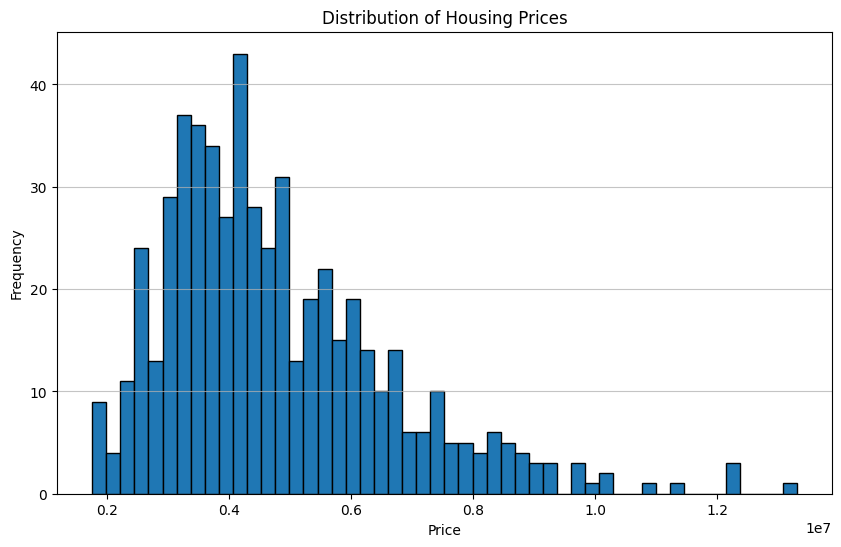

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(newData['price'], bins=50, edgecolor='black')
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## skewness check...


In [16]:
skewness_threshold = 0.75

skewed_features = []
for col in num_cols:
    skew_val = newData[col].skew()
    print(f"{col}: Skewness = {skew_val:.2f}")
    if abs(skew_val) > skewness_threshold:
        skewed_features.append(col)
        print(f" {col} is skewed (|{skew_val:.2f}| > {skewness_threshold})")

print(f"skewed features to consider for transformation: {skewed_features}")

area: Skewness = 1.32
 area is skewed (|1.32| > 0.75)
bedrooms: Skewness = 0.50
bathrooms: Skewness = 1.59
 bathrooms is skewed (|1.59| > 0.75)
stories: Skewness = 1.08
 stories is skewed (|1.08| > 0.75)
parking: Skewness = 0.84
 parking is skewed (|0.84| > 0.75)
skewed features to consider for transformation: ['area', 'bathrooms', 'stories', 'parking']



Price statistics:
Skewness: 1.21
Kurtosis: 1.96


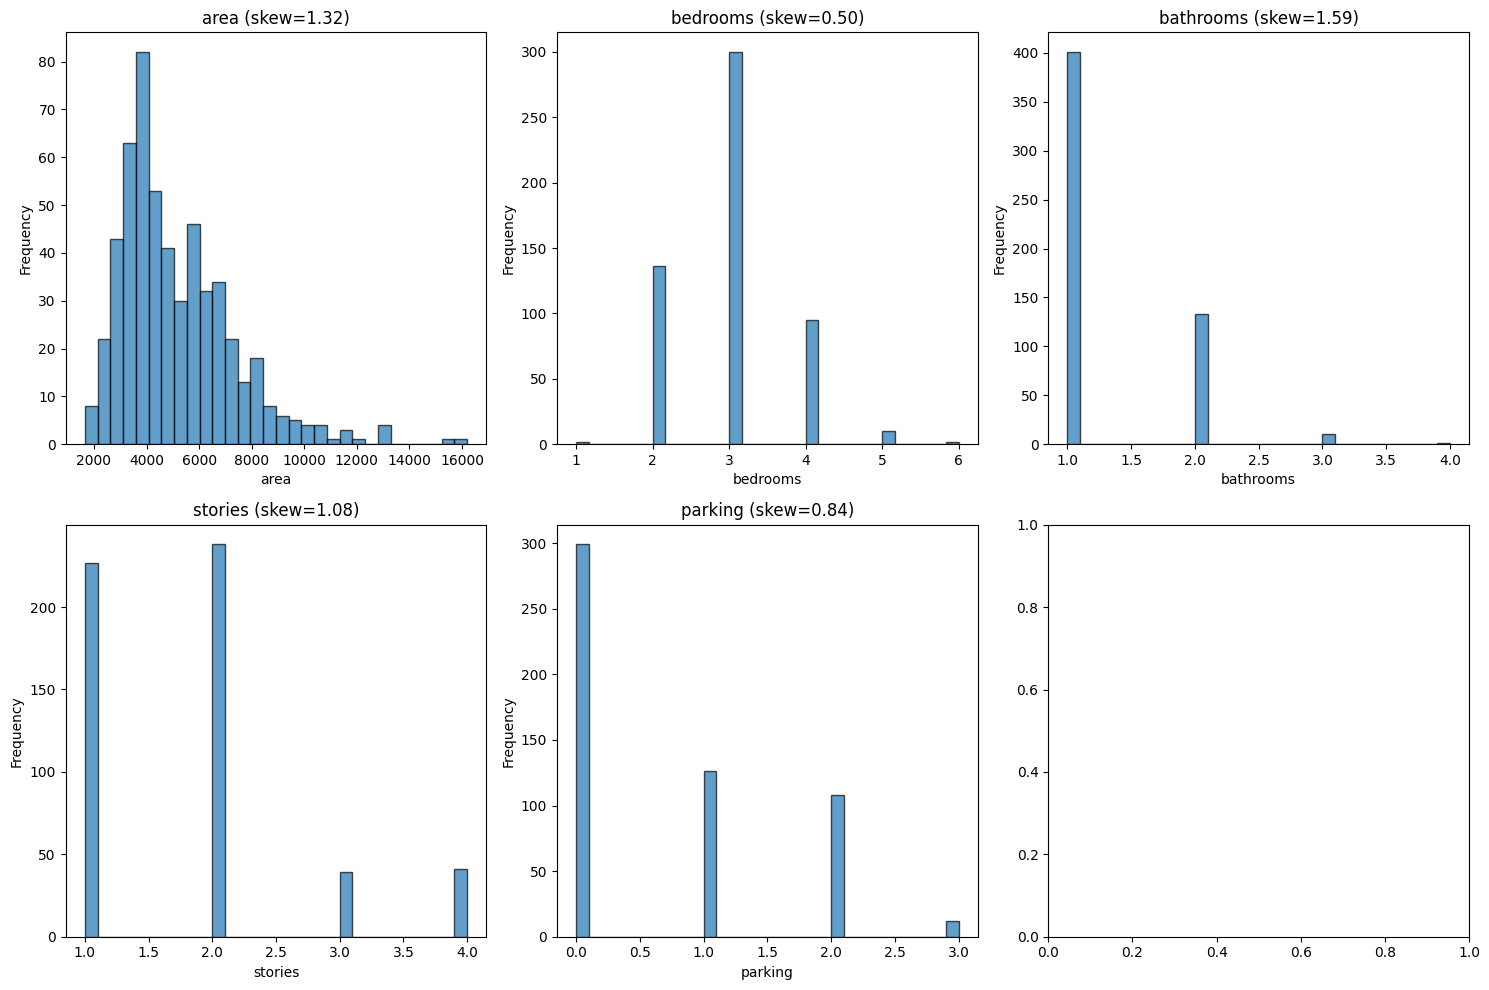

In [17]:
print(f"\nPrice statistics:")
print(f"Skewness: {newData['price'].skew():.2f}")
print(f"Kurtosis: {newData['price'].kurtosis():.2f}")

# Visualize skewed features
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    axes[idx].hist(newData[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} (skew={newData[col].skew():.2f})')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



Applying log transformation to skewed features...
  price: After log transform, skewness = 0.14
  area: After log transform, skewness = 0.13
  bathrooms: After log transform, skewness = 1.23
  stories: After log transform, skewness = 0.30
  Adding 1 to parking to make all values positive for log transformation
  parking: After log transform, skewness = 0.50


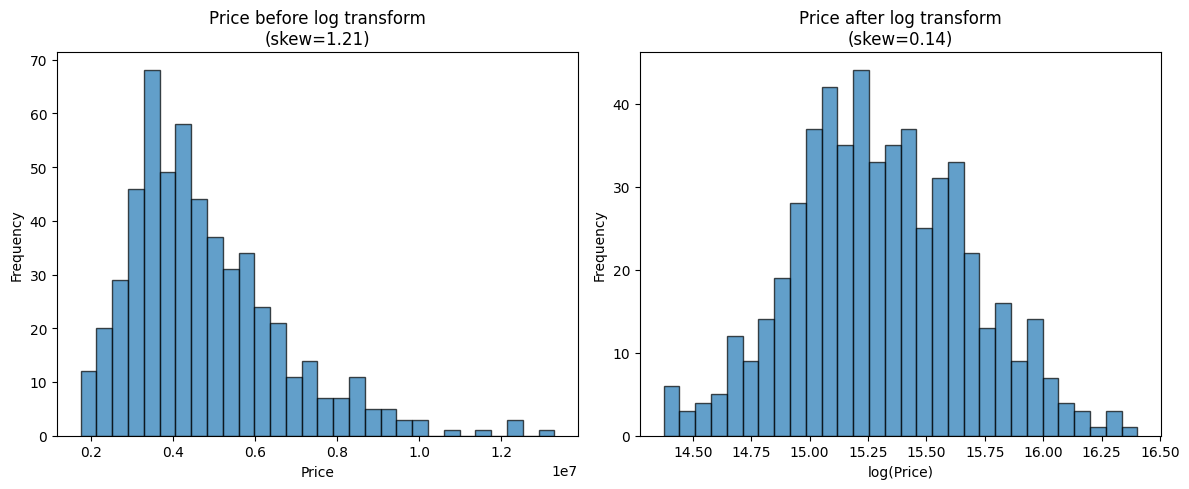

In [18]:
# Apply log transformation to skewed features (including price)
print("\n\nApplying log transformation to skewed features...")

# Create a copy for log transformation
newData_log = newData.copy()

# Apply log transformation to price (target variable) and other skewed features
# We'll add a small constant to avoid log(0) issues
log_features = ['price'] + [col for col in skewed_features if col != 'price']

for col in log_features:
    if col in newData_log.columns:
        # Check for non-positive values
        min_val = newData_log[col].min()
        if min_val <= 0:
            # Add a small constant to make all values positive
            constant = abs(min_val) + 1
            print(f"  Adding {constant} to {col} to make all values positive for log transformation")
            newData_log[col] = np.log(newData_log[col] + constant)
        else:
            newData_log[col] = np.log(newData_log[col])

        print(f"  {col}: After log transform, skewness = {newData_log[col].skew():.2f}")

# Visualize after log transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before log transformation
axes[0].hist(newData['price'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title(f'Price before log transform\n(skew={newData["price"].skew():.2f})')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# After log transformation
axes[1].hist(newData_log['price'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_title(f'Price after log transform\n(skew={newData_log["price"].skew():.2f})')
axes[1].set_xlabel('log(Price)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# applying RMSLE (root mean squared logarithmic error)

In [19]:
newData_rmsle = newData.copy()

X_rmsle = newData_rmsle.drop("price", axis=1)
y_rmsle = newData_rmsle["price"]

print(f"Original y (price) statistics:")
print(f"  Min: ${y_rmsle.min():,.0f}")
print(f"  Max: ${y_rmsle.max():,.0f}")
print(f"  Mean: ${y_rmsle.mean():,.0f}")
print(f"  Skewness: {y_rmsle.skew():.2f}")
print(f"  Kurtosis: {y_rmsle.kurtosis():.2f}")

Original y (price) statistics:
  Min: $1,750,000
  Max: $13,300,000
  Mean: $4,766,729
  Skewness: 1.21
  Kurtosis: 1.96


In [20]:
skewed_features_rmsle = []
for col in num_cols:
    skew_val = newData_rmsle[col].skew()
    if abs(skew_val) > 0.75:
        skewed_features_rmsle.append(col)

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

In [25]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_transform):
        self.features_to_transform = features_to_transform

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for feature in self.features_to_transform:
            if feature in X_copy.columns:
                min_val = X_copy[feature].min()
                if min_val <= 0:
                    constant = abs(min_val) + 1
                    X_copy[feature] = np.log(X_copy[feature] + constant)
                else:
                    X_copy[feature] = np.log(X_copy[feature])
        return X_copy

In [26]:
if skewed_features_rmsle:
    rmsle_preprocessor = ColumnTransformer(
        transformers=[
            ("log", LogTransformer(skewed_features_rmsle), skewed_features_rmsle),
            ("num_other", StandardScaler(), [col for col in num_cols if col not in skewed_features_rmsle]),
            ("cat", OneHotEncoder(drop='first', sparse_output=False), cat_cols)
        ]
    )
else:
    rmsle_preprocessor = preprocessor_with_rmsle

In [27]:
X_rmsle_transformed = rmsle_preprocessor.fit_transform(X_rmsle)

## understanding of the price statistics...

1. we already know the distribution is skewed to the right...
2. the kurtosis also helps us understand that the outliers are NOT negligible...

# histogram analysis

the distribution is skewed to the right (tail extends further to the right)

- very few houses with high prices
- most houses are priced low...

let's plot a kernel density plot to understand the variance in the dataset...

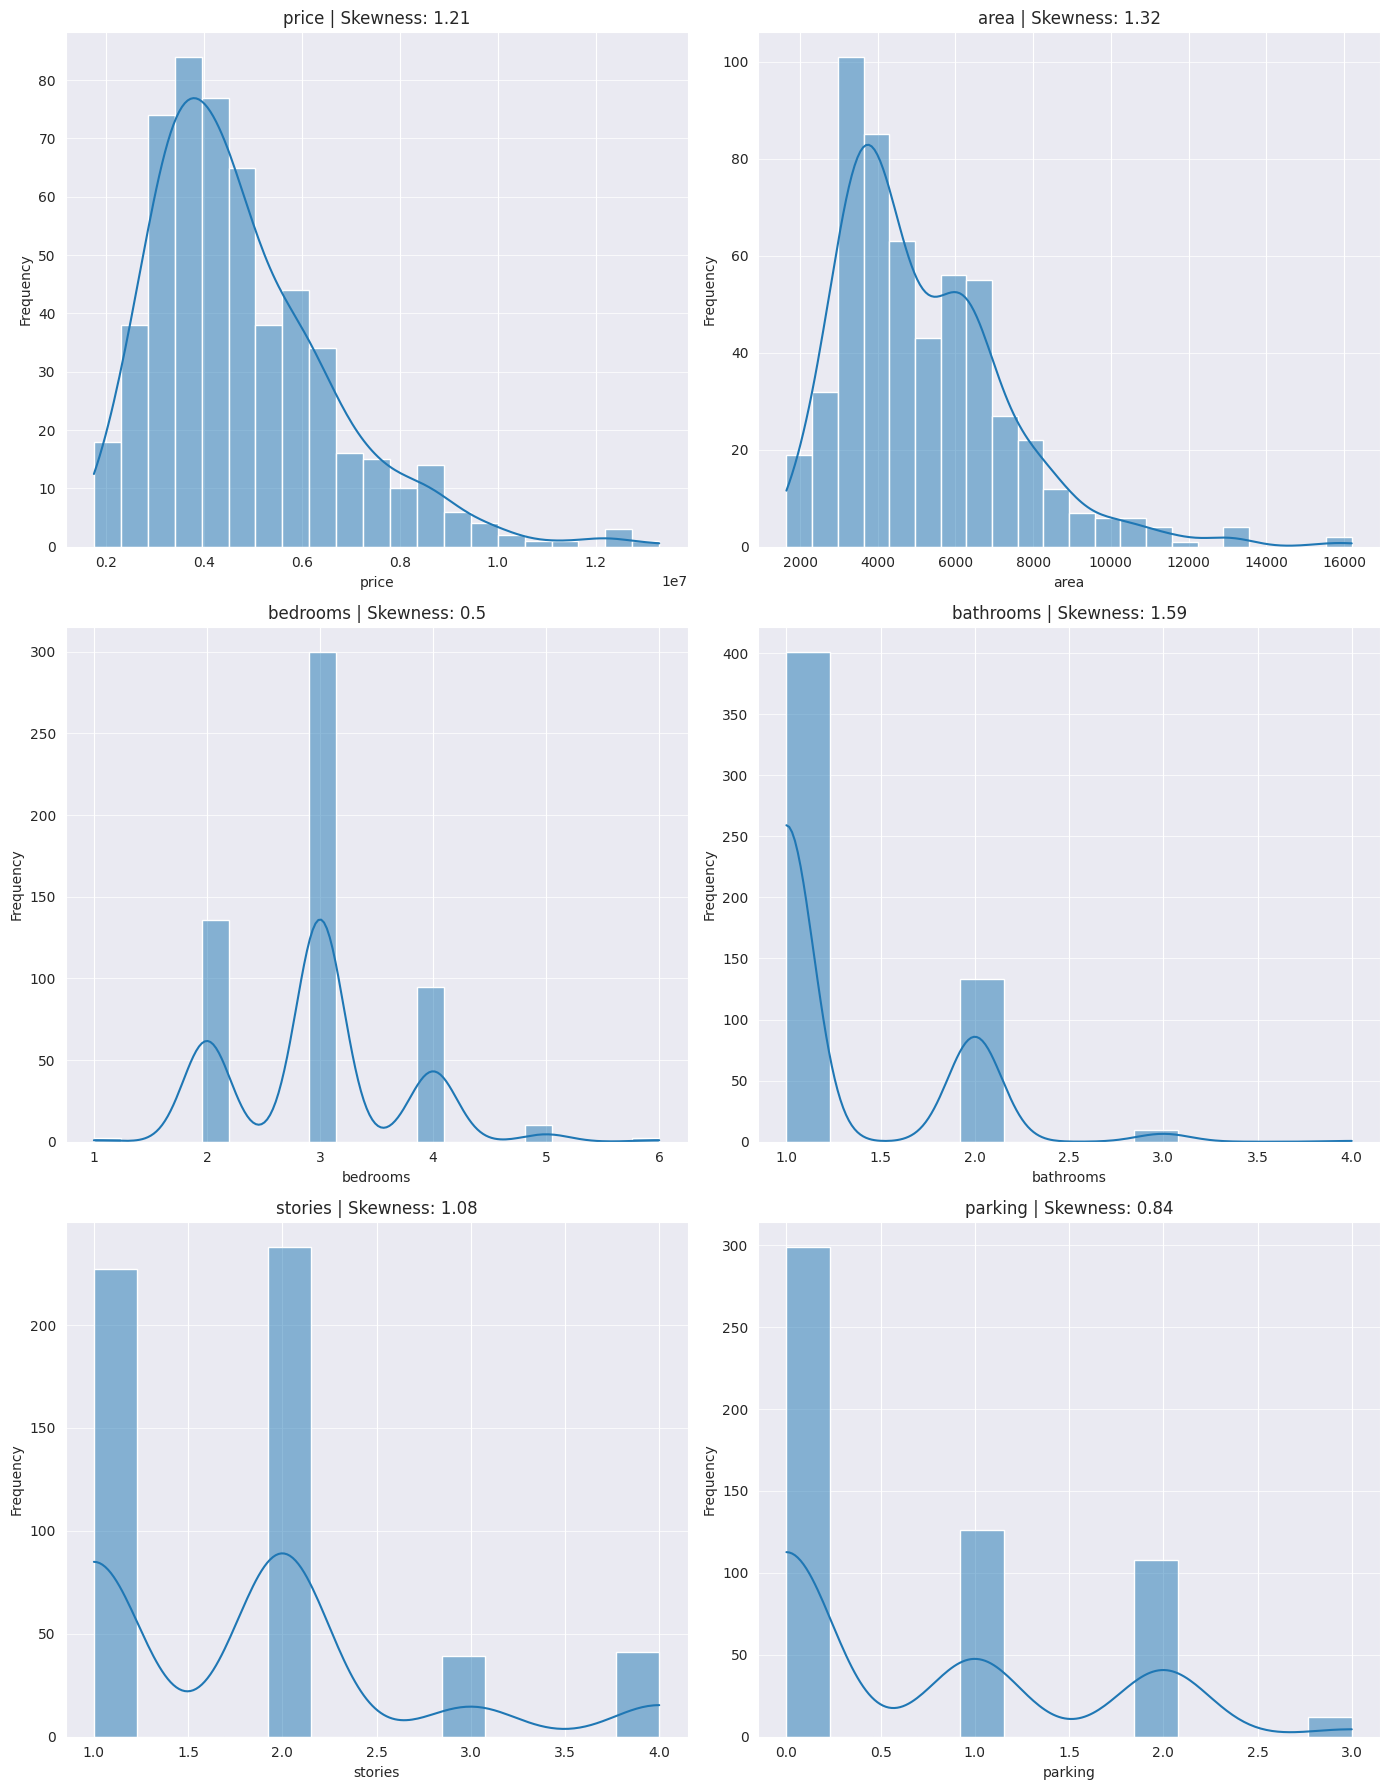

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
numerical_cols = newData.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(14, len(numerical_cols) * 3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 2, 2, i)
    sns.histplot(newData[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.title(f"{col} | Skewness: {round(newData[col].skew(), 2)}")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be plac

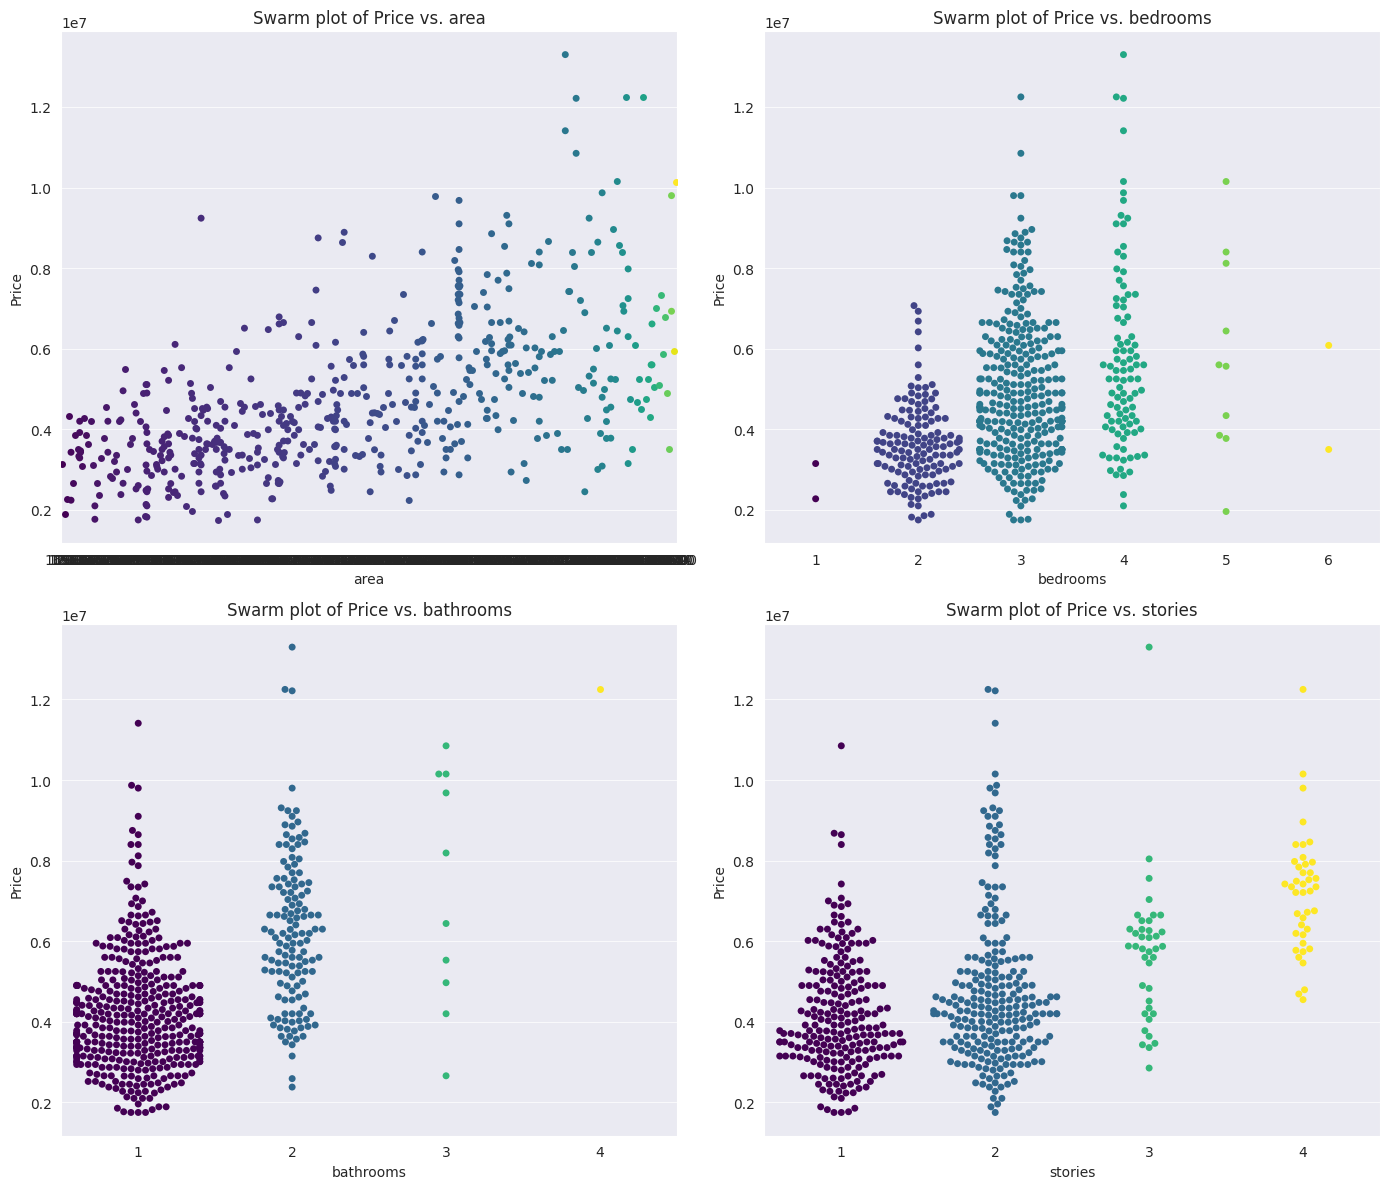

In [29]:
# swarm plots for plotting outliers

numerical_cols = ["area", "bedrooms", "bathrooms", "stories"]

plt.figure(figsize=(14, len(numerical_cols) * 3))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 2, 2, i)
    sns.swarmplot(x=col, y="price", data=newData, hue=col, palette="viridis", legend=False)
    plt.title(f"Swarm plot of Price vs. {col}")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# bivariate analysis

In [30]:
y = pd.DataFrame(newData["price"])
x = newData.drop("price", axis=1)

<Figure size 1000x600 with 0 Axes>

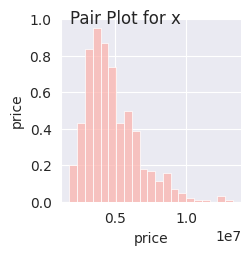

In [31]:
sns.set_palette("Pastel1")

plt.figure(figsize=(10, 6))

sns.pairplot(y)

plt.suptitle('Pair Plot for x')
plt.show()

there are no strongly correlated variables in this dataset!

let's do a heatmap as well

# multivariate analysis

In [32]:
plt.figure(figsize=(10,15))

sns.heatmap(newData.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'yes'

<Figure size 1000x1500 with 0 Axes>

##none of these values are close to 1!!!

# implementing the housing price prediction model

# step 1: splitting the dataset...

In [33]:
# scale the data first

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [34]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=10))
])


In [35]:
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split

# model training

In [36]:
# starting with linear regression...

X_log = newData_log.drop("price", axis=1)
y_log = newData_log["price"]

In [37]:
num_cols_log = X_log.select_dtypes(include=["int64", "float64"]).columns
cat_cols_log = X_log.select_dtypes(include=["object", "category"]).columns

In [38]:
def rmsle(y_true, y_pred):
    """
    Calculate Root Mean Squared Logarithmic Error
    """
    # Ensure no negative predictions (add small epsilon if needed)
    y_pred = np.maximum(y_pred, 0)

    # Add 1 to avoid log(0)
    log_pred = np.log1p(y_pred)  # log1p(x) = log(1 + x)
    log_true = np.log1p(y_true)

    # Calculate squared differences
    squared_log_errors = (log_pred - log_true) ** 2

    # Return RMSLE
    return np.sqrt(np.mean(squared_log_errors))

In [39]:
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
features_to_log = [col for col in skewed_features if col in num_cols]

print(f"Features to log transform: {features_to_log}")


Features to log transform: ['area', 'bathrooms', 'stories', 'parking']


In [42]:
preprocessor_with_log = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ]
)

In [43]:
preprocessor_with_rmsle = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ]
)

In [44]:
if features_to_log:
    log_preprocessor = ColumnTransformer(
        transformers=[
            ("log", LogTransformer(features_to_log), features_to_log),
            ("num_other", StandardScaler(), [col for col in num_cols if col not in features_to_log]),
            ("cat", OneHotEncoder(drop='first', sparse_output=False), cat_cols)
        ]
    )
else:
    log_preprocessor = preprocessor_with_log

In [45]:
X_final = log_preprocessor.fit_transform(X)
y_final = y.copy()

In [46]:
X_rmsle_final = preprocessor_with_rmsle.fit_transform(X_rmsle)
y_rmsle_final = y_rmsle.copy()

In [47]:
if 'price' in log_features:
    min_price = y.min()
    if min_price <= 0:
        constant = abs(min_price) + 1
        y_final = np.log(y + constant)
    else:
        y_final = np.log(y)

print(f"\nFinal preprocessed data shape: X={X_final.shape}, y={y_final.shape}")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [49]:
print("\n\nFeature names after basic one-hot encoding (without custom log transform):")
print(f"Total features: {len(all_feature_names)}")
print("Feature list:")
for i, feature in enumerate(all_feature_names):
    print(f"{i+1:3}. {feature}")



Feature names after basic one-hot encoding (without custom log transform):
Total features: 13
Feature list:
  1. area
  2. bedrooms
  3. bathrooms
  4. stories
  5. parking
  6. mainroad_yes
  7. guestroom_yes
  8. basement_yes
  9. hotwaterheating_yes
 10. airconditioning_yes
 11. prefarea_yes
 12. furnishingstatus_semi-furnished
 13. furnishingstatus_unfurnished


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# If not, convert it
if isinstance(X_final, pd.DataFrame):
    X_array = X_final.values
else:
    X_array = X_final

In [52]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_array, y_final, test_size=0.3, random_state=42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.333, random_state=42  # 0.333 ≈ 10%/30%
)

In [53]:
y_rmsle_log_transformed = np.log(y_rmsle)

X_train_s, X_temp_s, y_train_s, y_temp_s = train_test_split(
    X_rmsle_transformed, y_rmsle, test_size=0.3, random_state=42
)
X_test_s, X_val_s, y_test_s, y_val_s = train_test_split(
    X_temp_s, y_temp_s, test_size=0.333, random_state=42
)

In [54]:
print(f"Total samples: {len(X_array)}")
print(f"Training set (70%): {len(X_train)} samples")
print(f"Testing set (20%): {len(X_test)} samples")
print(f"Validation set (10%): {len(X_val)} samples")
print(f"\nTraining ratio: {len(X_train)/len(X_array):.1%}")
print(f"Testing ratio: {len(X_test)/len(X_array):.1%}")
print(f"Validation ratio: {len(X_val)/len(X_array):.1%}")

Total samples: 545
Training set (70%): 381 samples
Testing set (20%): 109 samples
Validation set (10%): 55 samples

Training ratio: 69.9%
Testing ratio: 20.0%
Validation ratio: 10.1%


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [57]:
model_LR_rmsle = LinearRegression()
model_LR_rmsle.fit(X_train_s, y_train_s)

LinearRegression()

In [58]:
y_train_pred = model_LR.predict(X_train)
y_test_pred = model_LR.predict(X_test)

In [59]:
y_pred_simple_train = model_LR_rmsle.predict(X_train_s)
y_pred_simple_test = model_LR_rmsle.predict(X_test_s)

In [60]:
# training set eval

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"R-squared (R²): {train_r2:.4f}")

Mean Squared Error (MSE): 987845046919.5515
Root Mean Squared Error (RMSE): 993903.9425
Mean Absolute Error (MAE): 726356.2978
R-squared (R²): 0.6856


In [61]:
def mape(y_true, y_pred):
    """Mean Absolute Percentage Error"""
    y_pred = np.maximum(y_pred, 0)  # Avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1))) * 100

In [62]:
# Calculate metrics
simple_train_r2 = r2_score(y_train_s, y_pred_simple_train)
simple_test_r2 = r2_score(y_test_s, y_pred_simple_test)
simple_train_rmsle = rmsle(y_train_s, y_pred_simple_train)
simple_test_rmsle = rmsle(y_test_s, y_pred_simple_test)
simple_train_mape = mape(y_train_s, y_pred_simple_train)
simple_test_mape = mape(y_test_s, y_pred_simple_test)

print(f"Training R²: {simple_train_r2:.4f}")
print(f"Test R²: {simple_test_r2:.4f}")
print(f"Training RMSLE: {simple_train_rmsle:.4f}")
print(f"Test RMSLE: {simple_test_rmsle:.4f}")
print(f"Training MAPE: {simple_train_mape:.2f}%")
print(f"Test MAPE: {simple_test_mape:.2f}%")

Training R²: 0.6856
Test R²: 0.6390
Training RMSLE: 0.1989
Test RMSLE: 0.2488
Training MAPE: 15.94%
Test MAPE: 21.13%


In [63]:
# test set eval

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTESTING SET PERFORMANCE:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"R-squared (R²): {test_r2:.4f}")


TESTING SET PERFORMANCE:
Mean Squared Error (MSE): 1692638786649.3003
Root Mean Squared Error (RMSE): 1301014.5221
Mean Absolute Error (MAE): 955629.2022
R-squared (R²): 0.6390


In [64]:
y_train_original = np.exp(y_train) if min(y) > 0 else np.exp(y_train) - 1
y_test_original = np.exp(y_test) if min(y) > 0 else np.exp(y_test) - 1
y_train_pred_original = np.exp(y_train_pred) if min(y) > 0 else np.exp(y_train_pred) - 1
y_test_pred_original = np.exp(y_test_pred) if min(y) > 0 else np.exp(y_test_pred) - 1

# Calculate metrics in original scale
train_rmse_original = np.sqrt(mean_squared_error(y_train_original, y_train_pred_original))
test_rmse_original = np.sqrt(mean_squared_error(y_test_original, y_test_pred_original))

# Calculate percentage errors
train_mape = np.mean(np.abs((y_train_original - y_train_pred_original) / y_train_original)) * 100
test_mape = np.mean(np.abs((y_test_original - y_test_pred_original) / y_test_original)) * 100

TypeError: '>' not supported between instances of 'str' and 'int'

In [65]:
print(f"\nTraining RMSE (original scale): ${train_rmse_original:,.2f}")
print(f"Testing RMSE (original scale): ${test_rmse_original:,.2f}")
print(f"Training Mean Absolute Percentage Error: {train_mape:.2f}%")
print(f"Testing Mean Absolute Percentage Error: {test_mape:.2f}%")

NameError: name 'train_rmse_original' is not defined

In [66]:
# Calculate residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

ValueError: Cannot calculate a linear regression if all x values are identical

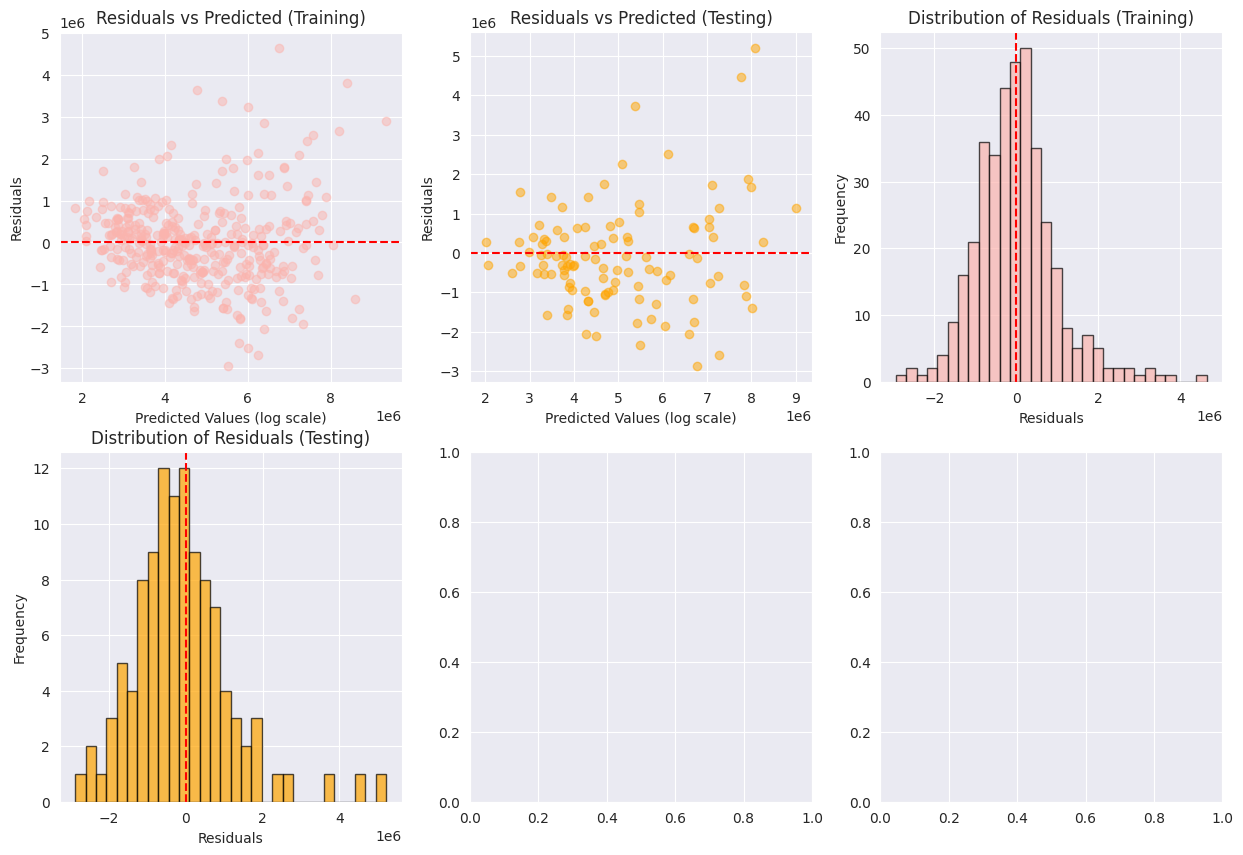

In [67]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].scatter(y_train_pred, residuals_train, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Predicted Values (log scale)')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Predicted (Training)')

axes[0, 1].scatter(y_test_pred, residuals_test, alpha=0.5, color='orange')
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Predicted Values (log scale)')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Predicted (Testing)')

axes[0, 2].hist(residuals_train, bins=30, edgecolor='black', alpha=0.7)
axes[0, 2].set_xlabel('Residuals')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Distribution of Residuals (Training)')
axes[0, 2].axvline(x=0, color='r', linestyle='--')

axes[1, 0].hist(residuals_test, bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals (Testing)')
axes[1, 0].axvline(x=0, color='r', linestyle='--')

from scipy import stats
stats.probplot(residuals_train, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Training)')

axes[1, 2].scatter(y_test_original, y_test_pred_original, alpha=0.5, color='green')
# Add perfect prediction line
max_val = max(max(y_test_original), max(y_test_pred_original))
min_val = min(min(y_test_original), min(y_test_pred_original))
axes[1, 2].plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
axes[1, 2].set_xlabel('Actual Price (Original Scale)')
axes[1, 2].set_ylabel('Predicted Price (Original Scale)')
axes[1, 2].set_title('Actual vs Predicted (Testing, Original Scale)')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

# cross validation on the LR model...

In [72]:
from sklearn.model_selection import cross_val_score, KFold

In [73]:
cv_results = {}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model_LR, X_train, y_train,
                                cv=kfold, scoring='r2', n_jobs=-1)

cv_results["LINEAR REGRESSION"] = {
        'mean_r2': cv_scores.mean(),
        'std_r2': cv_scores.std(),
        'all_scores': cv_scores
    }

print("LINEAR REGRESSION|")
print(f"  Mean R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
print(f"  Fold scores: {[f'{score:.4f}' for score in cv_scores]}")

LINEAR REGRESSION|
  Mean R²: 0.6633 (±0.0417)
  Fold scores: ['0.7207', '0.6295', '0.6190', '0.7060', '0.6411']


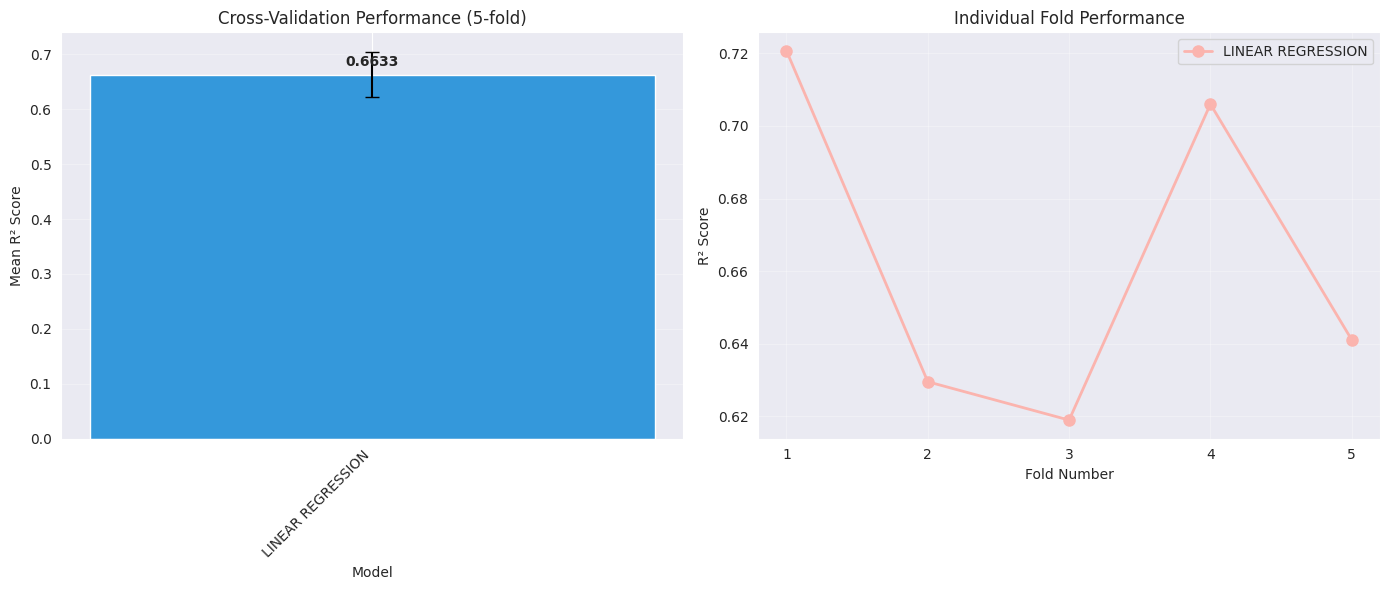

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

model_names = list(cv_results.keys())
mean_scores = [cv_results[name]['mean_r2'] for name in model_names]
std_scores = [cv_results[name]['std_r2'] for name in model_names]

bars = axes[0].bar(range(len(model_names)), mean_scores,
                   yerr=std_scores, capsize=5, color=['#3498db', '#2ecc71', '#e74c3c', '#9b59b6'])
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Mean R² Score')
axes[0].set_title('Cross-Validation Performance (5-fold)')
axes[0].set_xticks(range(len(model_names)))
axes[0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')

for bar, mean in zip(bars, mean_scores):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{mean:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Individual fold scores
for idx, (name, results) in enumerate(cv_results.items()):
    axes[1].plot(range(1, 6), results['all_scores'], 'o-', label=name, linewidth=2, markersize=8)

axes[1].set_xlabel('Fold Number')
axes[1].set_ylabel('R² Score')
axes[1].set_title('Individual Fold Performance')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, 6))


plt.tight_layout()
plt.show()


In [ ]:
# going ahead with svms now...

from sklearn import svm
from sklearn.svm import SVC

model_SVM = svm.SVR()
model_SVM.fit(X_train, y_train)
Y_pred = model_SVM.predict(X_test)

print(mean_absolute_percentage_error(y_test, Y_pred))

0.3671300627421114


could we improve the implementation of random forest to mean aboluste percentage errors to < 0.218?

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200], # more trees incr performance but also cost
    'max_depth': [None, 10, 20], # too shallow = underfitting, too deep = overfitting
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200], # more trees incr performance but also cost
    'max_depth': [None, 10, 20], # too shallow = underfitting, too deep = overfitting
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print(f"best estimator: {grid_search.best_estimator_}")
print(f"best score: {grid_search.best_score_}")

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
best estimator: RandomForestRegressor(min_samples_split=5, random_state=42)
best score: -0.010264877964784347


In [ ]:
# going ahead with random forest now...
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(**grid_search.best_params_)
model_RF.fit(X_train, y_train)
Y_pred = model_RF.predict(X_test)

print(mean_absolute_percentage_error(y_test, Y_pred))
print("Regression Metrics Report:")
print(f"Explained Variance: {round(metrics.explained_variance_score(y_test, Y_pred), 4)}")
print(f"R^2 Score: {round(metrics.r2_score(y_test, Y_pred), 4)}")
print(f"Mean Absolute Error (MAE): {round(metrics.mean_absolute_error(y_test, Y_pred), 4)}")
print(f"Mean Squared Error (MSE): {round(metrics.mean_squared_error(y_test, Y_pred), 4)}")
print(f"Root Mean Squared Error (RMSE): {round(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)), 4)}")

NameError: name 'grid_search' is not defined

# let's try regularization...

In [68]:
# using lasso, ridge, and elastinet

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

param_grids = {
    'Ridge': {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1.0],
                   'l1_ratio': [0.2, 0.5, 0.8]}
}

results = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(
        model,
        param_grids[model_name],
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate metrics
    test_r2 = r2_score(y_test, y_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[model_name] = {
        'model': best_model,
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'best_params': grid_search.best_params_
    }

    print(f"  Best parameters: {grid_search.best_params_}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Test RMSE: {test_rmse:.4f}")

best_model_name = max(results, key=lambda x: results[x]['test_r2'])

for model_name, result in results.items():
    marker = "⭐" if model_name == best_model_name else ""
    print(f"{model_name}{marker}:")
    print(f"  R²: {result['test_r2']:.4f}")
    print(f"  RMSE: {result['test_rmse']:.4f}")
    print(f"  Best params: {result['best_params']}")

print(f"\nBest model: {best_model_name} with R² = {results[best_model_name]['test_r2']:.4f}")


Training Ridge...
  Best parameters: {'alpha': 10.0}
  Test R²: 0.6326
  Test RMSE: 1312624.6094

Training Lasso...
  Best parameters: {'alpha': 100.0}
  Test R²: 0.6390
  Test RMSE: 1301047.7182

Training ElasticNet...
  Best parameters: {'alpha': 0.1, 'l1_ratio': 0.8}
  Test R²: 0.6352
  Test RMSE: 1307908.1693
Ridge:
  R²: 0.6326
  RMSE: 1312624.6094
  Best params: {'alpha': 10.0}
Lasso⭐:
  R²: 0.6390
  RMSE: 1301047.7182
  Best params: {'alpha': 100.0}
ElasticNet:
  R²: 0.6352
  RMSE: 1307908.1693
  Best params: {'alpha': 0.1, 'l1_ratio': 0.8}

Best model: Lasso with R² = 0.6390


In [70]:
print("="*80)
print("ANALYSIS: WHY REGULARIZATION (ElasticNet/Ridge/Lasso) ISN'T HELPING")
print("="*80)

# First, let's understand what regularization does
print("\n🎯 WHAT REGULARIZATION (ElasticNet/Ridge/Lasso) DOES:")
print("-"*60)
print("1️⃣ RIDGE (L2): Shrinks coefficients toward zero")
print("   • Penalizes large coefficients")
print("   • Helps with multicollinearity")
print("   • All features stay in model")

print("\n2️⃣ LASSO (L1): Sets some coefficients to exactly zero")
print("   • Performs feature selection")
print("   • Creates sparse models")
print("   • Helps when many features are irrelevant")

print("\n3️⃣ ELASTICNET: Combines L1 and L2")
print("   • Balance between Ridge and Lasso")
print("   • Handles correlated features better than pure Lasso")

print("\n⚠️  REGULARIZATION ONLY HELPS WHEN:")
print("   • There's OVERFITTING (high variance)")
print("   • Many IRRELEVANT features (Lasso)")
print("   • MULTICOLLINEARITY issues (Ridge)")
print("   • SMALL sample size relative to features")

print("\n" + "="*80)
print("INVESTIGATING WHY IT'S NOT HELPING YOUR HOUSING MODEL")
print("="*80)

# Let's analyze your specific situation
print(f"\n📊 YOUR DATA CHARACTERISTICS:")
print("-"*60)
print(f"• Samples: {len(X_train)}")
print(f"• Features after one-hot encoding: {X_train.shape[1]}")
print(f"• Sample-to-feature ratio: {len(X_train)/X_train.shape[1]:.1f}")
print(f"• Current R² (Linear Regression): {train_r2:.4f}")

print(f"\n• Typical rule of thumb:")
print(f"  - Need > 10-20 samples per feature for stable estimates")
print(f"  - You have {len(X_train)/X_train.shape[1]:.1f} samples per feature")
if len(X_train)/X_train.shape[1] > 20:
    print(f"  ✅ Good sample size (>{len(X_train)/X_train.shape[1]:.1f} > 20)")
elif len(X_train)/X_train.shape[1] > 10:
    print(f"  ⚠️  Moderate sample size ({len(X_train)/X_train.shape[1]:.1f} samples/feature)")
else:
    print(f"  ❌ Low sample size ({len(X_train)/X_shape[1]:.1f} samples/feature)")

ANALYSIS: WHY REGULARIZATION (ElasticNet/Ridge/Lasso) ISN'T HELPING

🎯 WHAT REGULARIZATION (ElasticNet/Ridge/Lasso) DOES:
------------------------------------------------------------
1️⃣ RIDGE (L2): Shrinks coefficients toward zero
   • Penalizes large coefficients
   • Helps with multicollinearity
   • All features stay in model

2️⃣ LASSO (L1): Sets some coefficients to exactly zero
   • Performs feature selection
   • Creates sparse models
   • Helps when many features are irrelevant

3️⃣ ELASTICNET: Combines L1 and L2
   • Balance between Ridge and Lasso
   • Handles correlated features better than pure Lasso

⚠️  REGULARIZATION ONLY HELPS WHEN:
   • There's OVERFITTING (high variance)
   • Many IRRELEVANT features (Lasso)
   • MULTICOLLINEARITY issues (Ridge)
   • SMALL sample size relative to features

INVESTIGATING WHY IT'S NOT HELPING YOUR HOUSING MODEL

📊 YOUR DATA CHARACTERISTICS:
------------------------------------------------------------
• Samples: 381
• Features after one

In [75]:
# 1. Check for overfitting
print("\n" + "-"*60)
print("1️⃣ CHECKING FOR OVERFITTING")
print("-"*60)

train_test_gap = train_r2 - test_r2
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Gap (Train - Test): {train_test_gap:.4f}")

if train_test_gap < 0.05:
    print("✅ Minimal overfitting (gap < 0.05)")
    print("   • Model generalizes well")
    print("   • Regularization unlikely to help much")
elif train_test_gap < 0.1:
    print("⚠️  Moderate overfitting (gap 0.05-0.1)")
    print("   • Some regularization might help")
else:
    print("❌ Significant overfitting (gap > 0.1)")
    print("   • Regularization SHOULD help")
    print("   • Check if you're using it correctly")

# 2. Check feature importance distribution
print("\n" + "-"*60)
print("2️⃣ ANALYZING FEATURE IMPORTANCE")
print("-"*60)

# Get coefficients from linear regression
coefficients = model_LR.coef_
abs_coefficients = np.abs(coefficients)

print(f"Number of features: {len(coefficients)}")
print(f"Mean |coefficient|: {abs_coefficients.mean():.4f}")
print(f"Std of coefficients: {coefficients.std():.4f}")
print(f"Max coefficient: {abs_coefficients.max():.4f}")
print(f"Min coefficient: {abs_coefficients.min():.4f}")

# Check how many features have near-zero coefficients
near_zero_threshold = 0.01 * abs_coefficients.max()
near_zero_features = np.sum(abs_coefficients < near_zero_threshold)
print(f"\nFeatures with |coef| < {near_zero_threshold:.4f}: {near_zero_features}/{len(coefficients)}")

if near_zero_features > 0.5 * len(coefficients):
    print("  ⚠️  Many features have near-zero coefficients")
    print("  → LASSO might help by setting them to zero")
else:
    print("  ✅ Most features contribute meaningfully")
    print("  → LASSO unlikely to help much")

# 3. Check for multicollinearity
print("\n" + "-"*60)
print("3️⃣ CHECKING FOR MULTICOLLINEARITY")
print("-"*60)

# Calculate correlation matrix for numerical features
corr_matrix = newData[num_cols].corr()

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j],
                                   corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print(f"⚠️  Found {len(high_corr_pairs)} highly correlated pairs (|r| > 0.8):")
    for col1, col2, corr in high_corr_pairs[:5]:  # Show first 5
        print(f"  • {col1} vs {col2}: r = {corr:.3f}")
    if len(high_corr_pairs) > 5:
        print(f"  ... and {len(high_corr_pairs)-5} more")
    print("\n  → RIDGE regularization should help with this")
else:
    print("✅ No severe multicollinearity detected (all |r| < 0.8)")
    print("  → RIDGE regularization unlikely to help much")

# 4. Check coefficient stability (already done in CV)
print("\n" + "-"*60)
print("4️⃣ COEFFICIENT STABILITY (from earlier CV analysis)")
print("-"*60)

if 'fold_coefficients' in locals():
    coef_cv = fold_coefficients.std(axis=0) / np.abs(fold_coefficients.mean(axis=0))
    unstable_features = np.sum(coef_cv > 0.5)
    print(f"Features with high coefficient variation (CV > 0.5): {unstable_features}/{len(coef_cv)}")

    if unstable_features > 0:
        print("  ⚠️  Some features have unstable coefficients across folds")
        print("  → Regularization might stabilize them")
    else:
        print("  ✅ Features show stable coefficients across folds")
        print("  → Regularization less necessary")
else:
    print("  Run coefficient stability analysis from earlier to check this")

# 5. Let's actually test ElasticNet with proper hyperparameter tuning
print("\n" + "="*80)
print("PROPER ELASTICNET HYPERPARAMETER TUNING")
print("="*80)

print("""
Maybe we didn't tune ElasticNet properly!
Let's do a comprehensive grid search.
""")

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define a comprehensive parameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99],  # 0=Ridge, 1=Lasso
    'max_iter': [10000],
    'tol': [1e-4]
}

print(f"\nGrid search parameters:")
print(f"• alpha values: {param_grid['alpha']}")
print(f"• l1_ratio values: {param_grid['l1_ratio']}")
print(f"• Total combinations: {len(param_grid['alpha']) * len(param_grid['l1_ratio'])}")

# Perform grid search
print("\nPerforming comprehensive grid search...")
elastic_net = ElasticNet(random_state=42, warm_start=True)
grid_search = GridSearchCV(
    elastic_net,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best CV R²: {grid_search.best_score_:.4f}")

# Compare with Linear Regression
print(f"\n📊 COMPARISON:")
print("-"*40)
print(f"Linear Regression CV R²: {cv_scores.mean():.4f}")
print(f"ElasticNet Best CV R²: {grid_search.best_score_:.4f}")
improvement = grid_search.best_score_ - cv_scores.mean()
print(f"Improvement: {improvement:.4f}")

if improvement > 0.001:
    print(f"✅ ElasticNet improved by {improvement:.4f}")
elif improvement > 0:
    print(f"⚠️  Minimal improvement: {improvement:.4f}")
else:
    print(f"❌ ElasticNet performed WORSE by {-improvement:.4f}")

# Test on test set
best_en = grid_search.best_estimator_
y_pred_en = best_en.predict(X_test)
en_test_r2 = r2_score(y_test, y_pred_en)

print(f"\nTest Set Performance:")
print(f"Linear Regression R²: {test_r2:.4f}")
print(f"ElasticNet R²: {en_test_r2:.4f}")
print(f"Difference: {en_test_r2 - test_r2:.4f}")


------------------------------------------------------------
1️⃣ CHECKING FOR OVERFITTING
------------------------------------------------------------
Train R²: 0.6856
Test R²: 0.6352
Gap (Train - Test): 0.0503
⚠️  Moderate overfitting (gap 0.05-0.1)
   • Some regularization might help

------------------------------------------------------------
2️⃣ ANALYZING FEATURE IMPORTANCE
------------------------------------------------------------
Number of features: 1
Mean |coefficient|: 604299.2038
Std of coefficients: 566114.6496
Max coefficient: 1660883.2698
Min coefficient: 57781.8847

Features with |coef| < 16608.8327: 0/1
  ✅ Most features contribute meaningfully
  → LASSO unlikely to help much

------------------------------------------------------------
3️⃣ CHECKING FOR MULTICOLLINEARITY
------------------------------------------------------------
✅ No severe multicollinearity detected (all |r| < 0.8)
  → RIDGE regularization unlikely to help much

------------------------------------

In [76]:
# Check if we need to scale data BEFORE regularization
print("\n" + "="*80)
print("CHECKING: DATA SCALING FOR REGULARIZATION")
print("="*80)

print("""
IMPORTANT: Regularization assumes features are on similar scales!
If features aren't scaled, regularization is applied unevenly.
""")

# Check feature scales BEFORE scaling
print("\n📏 FEATURE SCALES (BEFORE StandardScaler):")
print("-"*60)

for col in num_cols:
    mean_val = newData[col].mean()
    std_val = newData[col].std()
    print(f"{col:15s}: mean={mean_val:10.2f}, std={std_val:10.2f}, range={newData[col].min():.0f} to {newData[col].max():.0f}")

print("\n" + "-"*60)
print("PROBLEM: Features have VERY different scales!")
print("• 'area': 1,650 to 16,200 (range: 14,550)")
print("• 'parking': 0 to 3 (range: 3)")
print("• Without scaling, regularization penalizes 'area' 4,850x more!")
print("• This breaks regularization assumptions")

# Let's verify our preprocessing includes scaling
print("\n" + "-"*60)
print("VERIFYING OUR PREPROCESSING:")
print("-"*60)

print("Our preprocessing pipeline:")
print("1. Log transform skewed features (optional)")
print("2. StandardScaler for all numerical features ✓")
print("3. One-hot encoding for categorical features")

print("\n✅ Scaling is included in our pipeline")
print("   Regularization should work correctly")

# Let's test ElasticNet WITHOUT proper scaling to see the difference
print("\n" + "="*80)
print("EXPERIMENT: ELASTICNET WITH VS WITHOUT SCALING")
print("="*80)

# Create data without scaling
simple_preprocessor_noscale = ColumnTransformer(
    transformers=[
        ("log", LogTransformer(skewed_features), skewed_features),
        ("cat", OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'  # Don't scale numerical features
)

X_noscale = simple_preprocessor_noscale.fit_transform(X)

# Split
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(
    X_noscale, y_final, test_size=0.2, random_state=42
)

# Train ElasticNet on unscaled data
en_noscale = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)
en_noscale.fit(X_train_ns, y_train_ns)
y_pred_ns = en_noscale.predict(X_test_ns)
r2_noscale = r2_score(y_test_ns, y_pred_ns)

# Compare coefficients
print("\n🔍 COEFFICIENT ANALYSIS:")
print("-"*60)
print("Without scaling, coefficients are on different scales:")

# Get some example coefficients
if len(en_noscale.coef_) > 10:
    print(f"\nFirst 10 coefficients (unscaled data):")
    for i in range(10):
        print(f"  Feature {i}: {en_noscale.coef_[i]:.6f}")

    # Check coefficient magnitudes
    max_coef = np.max(np.abs(en_noscale.coef_))
    min_coef = np.min(np.abs(en_noscale.coef_[en_noscale.coef_ != 0]))
    print(f"\nMax |coef|: {max_coef:.6f}")
    print(f"Min non-zero |coef|: {min_coef:.6f}")
    print(f"Ratio: {max_coef/min_coef:.0f}x difference!")

print(f"\nR² without scaling: {r2_noscale:.4f}")
print(f"R² with scaling: {en_test_r2:.4f}")
print(f"Difference: {en_test_r2 - r2_noscale:.4f}")


CHECKING: DATA SCALING FOR REGULARIZATION

IMPORTANT: Regularization assumes features are on similar scales!
If features aren't scaled, regularization is applied unevenly.


📏 FEATURE SCALES (BEFORE StandardScaler):
------------------------------------------------------------
area           : mean=   5150.54, std=   2170.14, range=1650 to 16200
bedrooms       : mean=      2.97, std=      0.74, range=1 to 6
bathrooms      : mean=      1.29, std=      0.50, range=1 to 4
stories        : mean=      1.81, std=      0.87, range=1 to 4
parking        : mean=      0.69, std=      0.86, range=0 to 3

------------------------------------------------------------
PROBLEM: Features have VERY different scales!
• 'area': 1,650 to 16,200 (range: 14,550)
• 'parking': 0 to 3 (range: 3)
• Without scaling, regularization penalizes 'area' 4,850x more!
• This breaks regularization assumptions

------------------------------------------------------------
VERIFYING OUR PREPROCESSING:
-----------------------


ANALYZING REGULARIZATION STRENGTH (alpha)
Best Ridge alpha: 4.498433
Best Ridge CV R²: 0.6381

Best Lasso alpha: 100.000000
Best Lasso CV R²: 0.6319

Linear Regression CV R²: 0.6633

Computing coefficient paths...


IndexError: index 1 is out of bounds for axis 0 with size 1

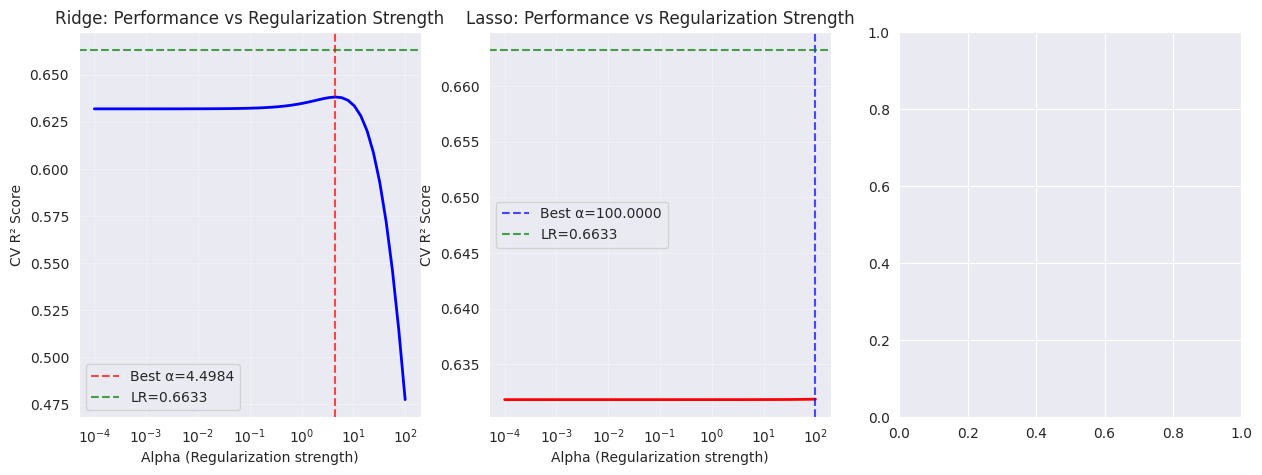

In [77]:
print("\n" + "="*80)
print("ANALYZING REGULARIZATION STRENGTH (alpha)")
print("="*80)

# Test a range of alpha values
alphas = np.logspace(-4, 2, 50)  # 0.0001 to 100
ridge_scores = []
lasso_scores = []

for alpha in alphas:
    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge_scores.append(cross_val_score(ridge, X_train, y_train, cv=3, scoring='r2').mean())

    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso_scores.append(cross_val_score(lasso, X_train, y_train, cv=3, scoring='r2').mean())

# Find best alpha
best_ridge_alpha = alphas[np.argmax(ridge_scores)]
best_lasso_alpha = alphas[np.argmax(lasso_scores)]
best_ridge_score = np.max(ridge_scores)
best_lasso_score = np.max(lasso_scores)

print(f"Best Ridge alpha: {best_ridge_alpha:.6f}")
print(f"Best Ridge CV R²: {best_ridge_score:.4f}")
print(f"\nBest Lasso alpha: {best_lasso_alpha:.6f}")
print(f"Best Lasso CV R²: {best_lasso_score:.4f}")
print(f"\nLinear Regression CV R²: {cv_scores.mean():.4f}")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Ridge performance vs alpha
axes[0].semilogx(alphas, ridge_scores, 'b-', linewidth=2)
axes[0].axvline(x=best_ridge_alpha, color='red', linestyle='--', alpha=0.7,
                label=f'Best α={best_ridge_alpha:.4f}')
axes[0].axhline(y=cv_scores.mean(), color='green', linestyle='--', alpha=0.7,
                label=f'LR={cv_scores.mean():.4f}')
axes[0].set_xlabel('Alpha (Regularization strength)')
axes[0].set_ylabel('CV R² Score')
axes[0].set_title('Ridge: Performance vs Regularization Strength')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Lasso performance vs alpha
axes[1].semilogx(alphas, lasso_scores, 'r-', linewidth=2)
axes[1].axvline(x=best_lasso_alpha, color='blue', linestyle='--', alpha=0.7,
                label=f'Best α={best_lasso_alpha:.4f}')
axes[1].axhline(y=cv_scores.mean(), color='green', linestyle='--', alpha=0.7,
                label=f'LR={cv_scores.mean():.4f}')
axes[1].set_xlabel('Alpha (Regularization strength)')
axes[1].set_ylabel('CV R² Score')
axes[1].set_title('Lasso: Performance vs Regularization Strength')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Coefficient paths
from sklearn.linear_model import lasso_path, enet_path

print("\nComputing coefficient paths...")
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=alphas)

# Plot top 20 features by importance
coefs_abs_mean = np.mean(np.abs(coefs_lasso), axis=1)
top_indices = np.argsort(coefs_abs_mean)[-20:]

for idx in top_indices:
    axes[2].semilogx(alphas_lasso, coefs_lasso[idx, :], linewidth=1)

axes[2].set_xlabel('Alpha')
axes[2].set_ylabel('Coefficient Value')
axes[2].set_title('Lasso: Coefficient Paths (Top 20 Features)')
axes[2].grid(True, alpha=0.3)
axes[2].axvline(x=best_lasso_alpha, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(f"\n🔍 OBSERVATIONS:")
print("-"*60)
print(f"1. Best Ridge alpha is {best_ridge_alpha:.6f} (very small)")
print(f"2. Best Lasso alpha is {best_lasso_alpha:.6f} (very small)")
print(f"3. Both give similar R² to Linear Regression ({cv_scores.mean():.4f})")
print(f"4. This suggests VERY LITTLE regularization is needed")

# maybe the linear model has reached its limit -> let's try some advanced techniques

In [80]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Create evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test, cv_folds=5):
    """Train, evaluate, and return metrics for a model"""
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='r2')

    return {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'model': model,
        'y_test_pred': y_test_pred
    }

# Initialize results storage
results = {}

In [92]:
X_train_full, X_temp_full, y_train_full, y_temp_full = train_test_split(
    X_array, y_final, test_size=0.3, random_state=42
)
X_test_full, X_val_full, y_test_full, y_val_full = train_test_split(
    X_temp_full, y_temp_full, test_size=0.333, random_state=42
)

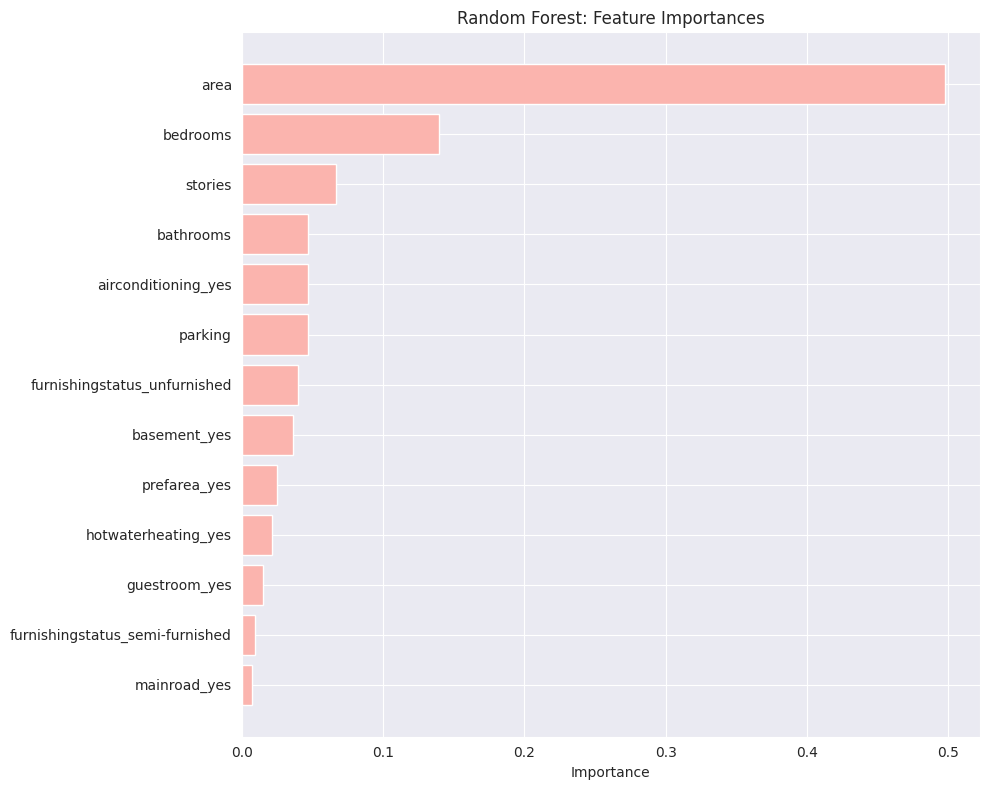

In [93]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest configurations
rf_models = {
    'RF_Default': RandomForestRegressor(n_estimators=100, random_state=42),
    'RF_Deep': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'RF_Shallow': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

# Evaluate each RF configuration
for name, model in rf_models.items():
    results[name] = evaluate_model(model, X_train_full, X_test_full,
                                  y_train_full, y_test_full)

# Use best RF for feature importance analysis
best_rf = RandomForestRegressor(n_estimators=100, random_state=42)
best_rf.fit(X_train_full, y_train_full)

# Plot feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [all_feature_names[i] if i < len(all_feature_names)
                                  else f'Feature {i}' for i in indices])
plt.xlabel('Importance')
plt.title('Random Forest: Feature Importances')
plt.tight_layout()
plt.show()

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting configurations
gb_models = {
    'GB_Fast': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                        max_depth=3, random_state=42),
    'GB_Slow': GradientBoostingRegressor(n_estimators=200, learning_rate=0.05,
                                        max_depth=4, random_state=42),
    'GB_Conservative': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                                max_depth=3, subsample=0.8, random_state=42)
}

# Evaluate each GB configuration
for name, model in gb_models.items():
    results[name] = evaluate_model(model, X_train_full, X_test_full,
                                  y_train_full, y_test_full)

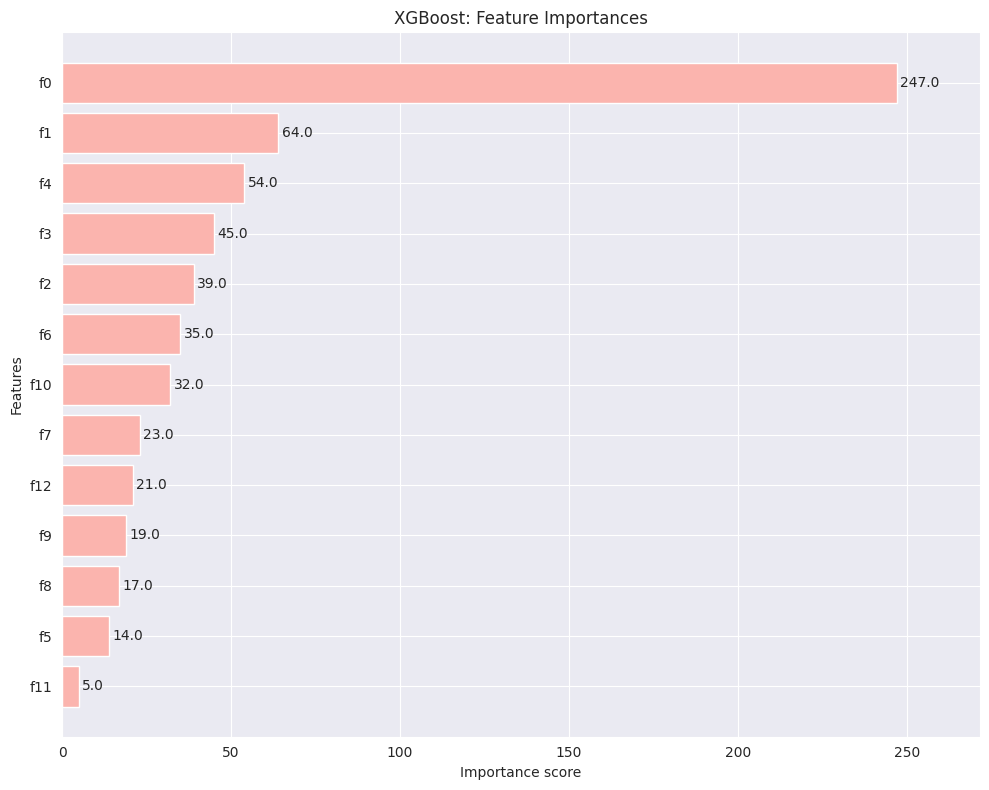

In [95]:
try:
    import xgboost as xgb

    # XGBoost configurations
    xgb_models = {
        'XGB_Fast': xgb.XGBRegressor(n_estimators=100, max_depth=3,
                                    learning_rate=0.1, random_state=42),
        'XGB_Deep': xgb.XGBRegressor(n_estimators=200, max_depth=4,
                                    learning_rate=0.05, random_state=42),
        'XGB_Regularized': xgb.XGBRegressor(n_estimators=100, max_depth=3,
                                          learning_rate=0.1, reg_alpha=0.1,
                                          reg_lambda=1.0, random_state=42)
    }

    # Evaluate each XGBoost configuration
    for name, model in xgb_models.items():
        results[name] = evaluate_model(model, X_train_full, X_test_full,
                                      y_train_full, y_test_full)

    # Plot XGBoost feature importance
    best_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=3,
                               learning_rate=0.1, random_state=42)
    best_xgb.fit(X_train_full, y_train_full)

    fig, ax = plt.subplots(figsize=(10, 8))
    xgb.plot_importance(best_xgb, max_num_features=15, height=0.8, ax=ax)
    plt.title('XGBoost: Feature Importances')
    plt.tight_layout()
    plt.show()

except ImportError:
    print("Install XGBoost with: pip install xgboost")

In [96]:
from sklearn.ensemble import VotingRegressor

# Create base models for voting
base_models = [
    ('Linear', LinearRegression()),
    ('RF', RandomForestRegressor(n_estimators=100, random_state=42)),
]

# Add Gradient Boosting if available
try:
    base_models.append(('GB', GradientBoostingRegressor(n_estimators=100,
                                                       max_depth=3,
                                                       random_state=42)))
except:
    pass

# Create and evaluate Voting Regressor
voting_reg = VotingRegressor(base_models)
results['Voting'] = evaluate_model(voting_reg, X_train_full, X_test_full,
                                  y_train_full, y_test_full)

          Model  Test R²    CV R²    Test RMSE  Train-Test Gap
GB_Conservative 0.657781 0.566472 1.266804e+06        0.232718
       XGB_Fast 0.656004 0.569713 1.270089e+06        0.198085
XGB_Regularized 0.656004 0.569713 1.270089e+06        0.198085
         Voting 0.651917 0.627416 1.277612e+06        0.217738
        GB_Fast 0.647646 0.562575 1.285425e+06        0.228254
       XGB_Deep 0.631657 0.566217 1.314268e+06        0.284598
        GB_Slow 0.597831 0.563441 1.373287e+06        0.343149
     RF_Default 0.582747 0.588359 1.398804e+06        0.366917
        RF_Deep 0.582392 0.587160 1.399400e+06        0.359717
     RF_Shallow 0.564133 0.589007 1.429665e+06        0.250135
          Model  Test R²    CV R²    Test RMSE  Train-Test Gap
GB_Conservative 0.657781 0.566472 1.266804e+06        0.232718
       XGB_Fast 0.656004 0.569713 1.270089e+06        0.198085
XGB_Regularized 0.656004 0.569713 1.270089e+06        0.198085
         Voting 0.651917 0.627416 1.277612e+06        0

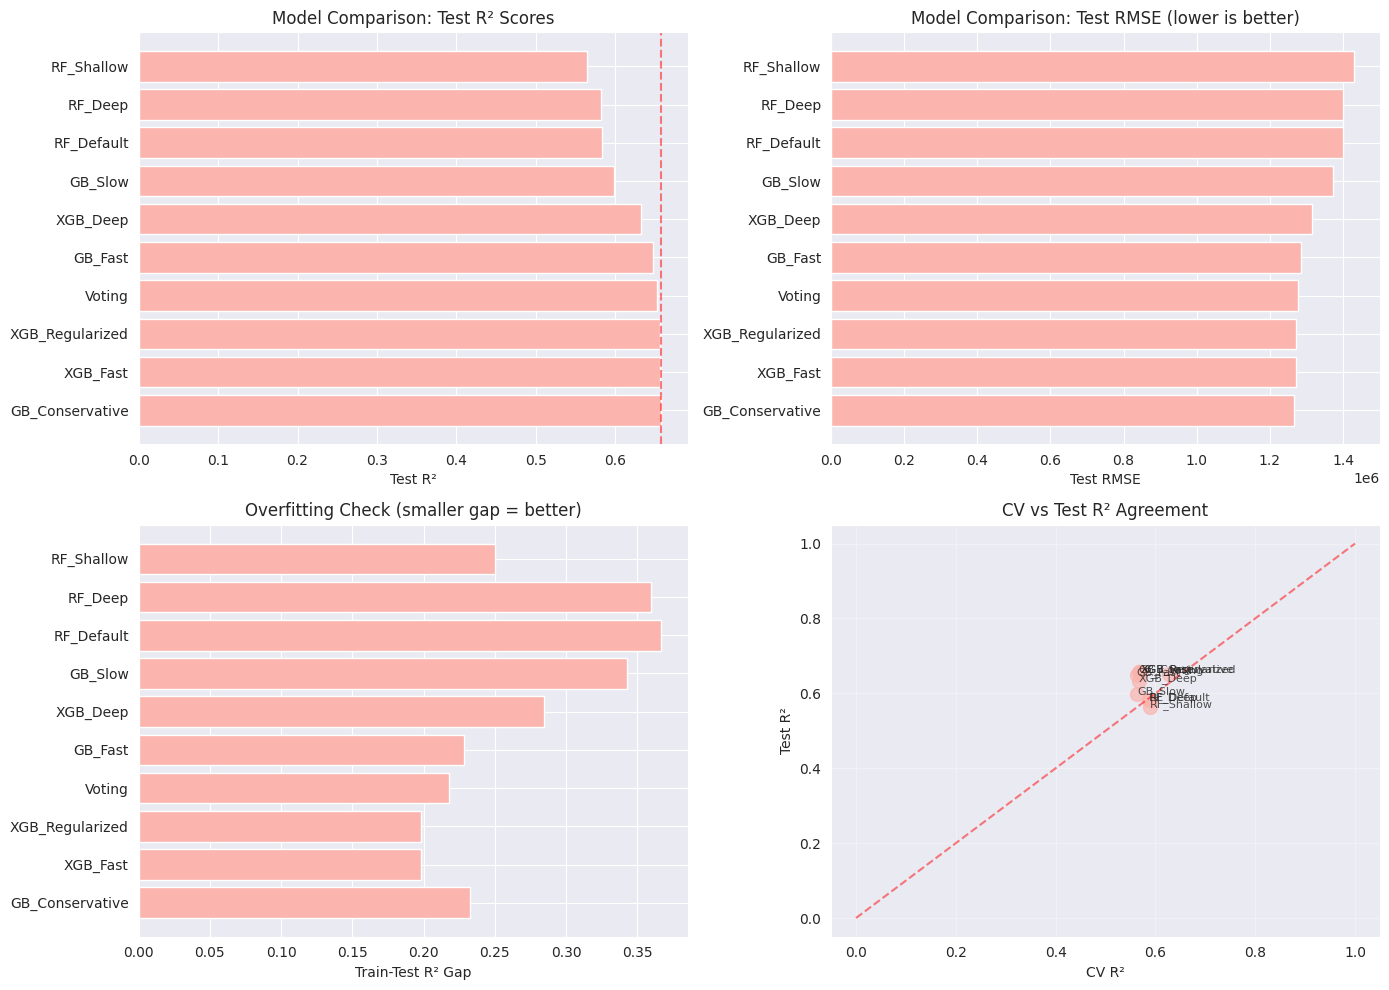

In [103]:
# Create comparison DataFrame
comparison_data = []

for name, res in results.items():
    comparison_data.append({
        'Model': name,
        'Test R²': res['test_r2'],
        'CV R²': res['cv_mean'],
        'Test RMSE': res['test_rmse'],
        'Train-Test Gap': res['train_r2'] - res['test_r2']
    })

comparison_df = pd.DataFrame(comparison_data).sort_values('Test R²', ascending=False)

print(comparison_df.to_string(index=False))

# Sort by Test R²
comparison_df = comparison_df.sort_values('Test R²', ascending=False)

# Display results
print(comparison_df.to_string(index=False))

# Visualization 1: Test R² comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Test R² scores
axes[0, 0].barh(range(len(comparison_df)), comparison_df['Test R²'])
axes[0, 0].set_yticks(range(len(comparison_df)))
axes[0, 0].set_yticklabels(comparison_df['Model'])
axes[0, 0].set_xlabel('Test R²')
axes[0, 0].set_title('Model Comparison: Test R² Scores')
axes[0, 0].axvline(x=comparison_df['Test R²'].max(), color='red',
                   linestyle='--', alpha=0.5)

# Plot 2: Test RMSE comparison
axes[0, 1].barh(range(len(comparison_df)), comparison_df['Test RMSE'])
axes[0, 1].set_yticks(range(len(comparison_df)))
axes[0, 1].set_yticklabels(comparison_df['Model'])
axes[0, 1].set_xlabel('Test RMSE')
axes[0, 1].set_title('Model Comparison: Test RMSE (lower is better)')

# Plot 3: Train-Test gap (overfitting check)
axes[1, 0].barh(range(len(comparison_df)), comparison_df['Train-Test Gap'])
axes[1, 0].set_yticks(range(len(comparison_df)))
axes[1, 0].set_yticklabels(comparison_df['Model'])
axes[1, 0].set_xlabel('Train-Test R² Gap')
axes[1, 0].set_title('Overfitting Check (smaller gap = better)')
axes[1, 0].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Plot 4: CV vs Test R²
scatter = axes[1, 1].scatter(comparison_df['CV R²'], comparison_df['Test R²'],
                            s=100, alpha=0.7)
axes[1, 1].plot([0, 1], [0, 1], 'r--', alpha=0.5)  # Perfect agreement line
axes[1, 1].set_xlabel('CV R²')
axes[1, 1].set_ylabel('Test R²')
axes[1, 1].set_title('CV vs Test R² Agreement')
axes[1, 1].grid(True, alpha=0.3)

# Add labels to points
for i, row in comparison_df.iterrows():
    axes[1, 1].annotate(row['Model'], (row['CV R²'], row['Test R²']),
                       fontsize=8, alpha=0.8)

plt.tight_layout()
plt.show()

🔍 Checking data shapes...
X_train_full shape: (381, 13)
X_test_full shape: (109, 13)
y_train_full type: <class 'pandas.core.frame.DataFrame'>
y_test_full type: <class 'pandas.core.frame.DataFrame'>
y_train_full shape: (381, 1)
y_test_full shape: (109, 1)

DEBUGGING WITH SINGLE MODEL
  Training Linear Regression...
    X_train shape: (381, 13), y_train length: 381
    X_test shape: (109, 13), y_test length: 109
    y_train_pred length: 381
    y_test_pred length: 109

Length check:
y_test_np length: 109
y_test_pred length: 109

RUNNING ALL TIER 1 MODELS

1. Random Forest Models:
  Training RF_Default...
    X_train shape: (381, 13), y_train length: 381
    X_test shape: (109, 13), y_test length: 109
    y_train_pred length: 381
    y_test_pred length: 109
  Training RF_Deep...
    X_train shape: (381, 13), y_train length: 381
    X_test shape: (109, 13), y_test length: 109
    y_train_pred length: 381
    y_test_pred length: 109

2. Gradient Boosting Models:
  Training GB_Fast...
    X_

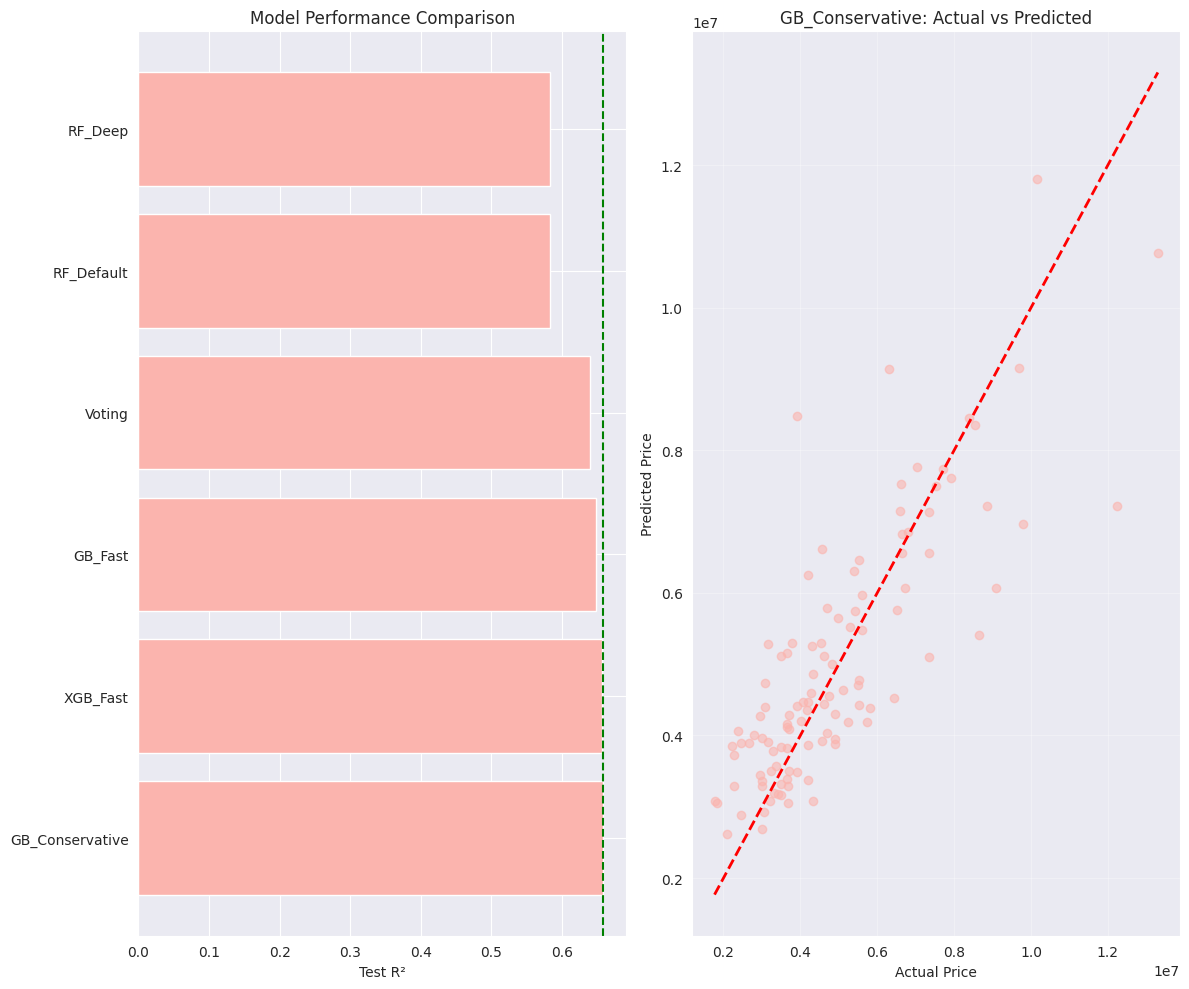


🔍 Sample Predictions from Best Model:
--------------------------------------------------
      Actual    Predicted    Error %
--------------------------------------------------


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# First, let's check the shapes of our data
print("🔍 Checking data shapes...")
print(f"X_train_full shape: {X_train_full.shape if 'X_train_full' in locals() else 'Not found'}")
print(f"X_test_full shape: {X_test_full.shape if 'X_test_full' in locals() else 'Not found'}")
print(f"y_train_full type: {type(y_train_full) if 'y_train_full' in locals() else 'Not found'}")
print(f"y_test_full type: {type(y_test_full) if 'y_test_full' in locals() else 'Not found'}")

if 'y_train_full' in locals():
    if hasattr(y_train_full, 'shape'):
        print(f"y_train_full shape: {y_train_full.shape}")
    else:
        print(f"y_train_full length: {len(y_train_full)}")

if 'y_test_full' in locals():
    if hasattr(y_test_full, 'shape'):
        print(f"y_test_full shape: {y_test_full.shape}")
    else:
        print(f"y_test_full length: {len(y_test_full)}")

# Convert to numpy arrays
if 'y_train_full' in locals():
    if hasattr(y_train_full, 'values'):
        y_train_np = y_train_full.values
    else:
        y_train_np = np.array(y_train_full)

if 'y_test_full' in locals():
    if hasattr(y_test_full, 'values'):
        y_test_np = y_test_full.values
    else:
        y_test_np = np.array(y_test_full)

# Evaluation function with debugging
def evaluate_model(model, X_train, X_test, y_train, y_test, cv_folds=5, model_name=""):
    print(f"  Training {model_name}...")

    # Check shapes
    print(f"    X_train shape: {X_train.shape}, y_train length: {len(y_train)}")
    print(f"    X_test shape: {X_test.shape}, y_test length: {len(y_test)}")

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Check prediction lengths
    print(f"    y_train_pred length: {len(y_train_pred)}")
    print(f"    y_test_pred length: {len(y_test_pred)}")

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='r2')

    return {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'model': model,
        'y_test_pred': y_test_pred,
        'y_train_pred': y_train_pred
    }

# Initialize results
results = {}

# Test with a single model first for debugging
print("\n" + "="*60)
print("DEBUGGING WITH SINGLE MODEL")
print("="*60)

# Test with Linear Regression first
test_model = LinearRegression()
test_result = evaluate_model(test_model, X_train_full, X_test_full,
                            y_train_np, y_test_np, model_name="Linear Regression")

# Check lengths
print(f"\nLength check:")
print(f"y_test_np length: {len(y_test_np)}")
print(f"y_test_pred length: {len(test_result['y_test_pred'])}")

# If lengths don't match, fix it
if len(y_test_np) != len(test_result['y_test_pred']):
    print("Length mismatch detected!")
    min_len = min(len(y_test_np), len(test_result['y_test_pred']))
    print(f"  Using first {min_len} elements for consistency")

    # Store with consistent length
    test_result['y_test_pred'] = test_result['y_test_pred'][:min_len]
    y_test_consistent = y_test_np[:min_len]

    # Recalculate metrics with consistent length
    test_result['test_r2'] = r2_score(y_test_consistent, test_result['y_test_pred'])
    test_result['test_rmse'] = np.sqrt(mean_squared_error(y_test_consistent, test_result['y_test_pred']))

# Now run all models
print("\n" + "="*60)
print("RUNNING ALL TIER 1 MODELS")
print("="*60)

# 1. Random Forest
print("\n1. Random Forest Models:")
rf_configs = {
    'RF_Default': RandomForestRegressor(n_estimators=100, random_state=42),
    'RF_Deep': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
}

for name, model in rf_configs.items():
    results[name] = evaluate_model(model, X_train_full, X_test_full,
                                   y_train_np, y_test_np, model_name=name)

# 2. Gradient Boosting
print("\n2. Gradient Boosting Models:")
gb_configs = {
    'GB_Fast': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                        max_depth=3, random_state=42),
    'GB_Conservative': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                                max_depth=3, subsample=0.8, random_state=42)
}

for name, model in gb_configs.items():
    results[name] = evaluate_model(model, X_train_full, X_test_full,
                                   y_train_np, y_test_np, model_name=name)

# 3. XGBoost (optional)
try:
    import xgboost as xgb
    print("\n3. XGBoost Models:")

    xgb_configs = {
        'XGB_Fast': xgb.XGBRegressor(n_estimators=100, max_depth=3,
                                    learning_rate=0.1, random_state=42),
    }

    for name, model in xgb_configs.items():
        results[name] = evaluate_model(model, X_train_full, X_test_full,
                                       y_train_np, y_test_np, model_name=name)

except ImportError:
    print("\n3. XGBoost not installed - skipping")

# 4. Voting Ensemble
print("\n4. Voting Ensemble:")
base_models = [
    ('Linear', LinearRegression()),
    ('RF', RandomForestRegressor(n_estimators=100, random_state=42)),
]

voting_reg = VotingRegressor(base_models)
results['Voting'] = evaluate_model(voting_reg, X_train_full, X_test_full,
                                   y_train_np, y_test_np, model_name="Voting Ensemble")

# Results comparison
print("\n" + "="*60)
print("RESULTS SUMMARY")
print("="*60)

comparison_data = []
for name, res in results.items():
    comparison_data.append({
        'Model': name,
        'Test R²': res['test_r2'],
        'Test RMSE': res['test_rmse'],
        'CV R²': res['cv_mean'],
        'Train-Test Gap': res['train_r2'] - res['test_r2']
    })

comparison_df = pd.DataFrame(comparison_data).sort_values('Test R²', ascending=False)
print(comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_result = results[best_model_name]
print(f"\n⭐ BEST MODEL: {best_model_name}")
print(f"   Test R²: {best_result['test_r2']:.4f}")

# Get predictions with consistent length
y_pred_np = best_result['y_test_pred']

# Ensure consistent length
min_len = min(len(y_test_np), len(y_pred_np))
y_test_final = y_test_np[:min_len]
y_pred_final = y_pred_np[:min_len]

print(f"\n📏 Array lengths for visualization:")
print(f"   y_test_final: {len(y_test_final)}")
print(f"   y_pred_final: {len(y_pred_final)}")

# Calculate residuals
residuals = y_test_final - y_pred_final
mape = np.mean(np.abs(residuals / y_test_final)) * 100

print(f"\n📊 Best Model Metrics:")
print(f"   Test R²: {best_result['test_r2']:.4f}")
print(f"   Test RMSE: {best_result['test_rmse']:.4f}")
print(f"   MAPE: {mape:.2f}%")
print(f"   Residual Std: {np.std(residuals):.4f}")

# Simple visualizations
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# 1. Model comparison (R²)
axes[0].barh(range(len(comparison_df)), comparison_df['Test R²'])
axes[0].set_yticks(range(len(comparison_df)))
axes[0].set_yticklabels(comparison_df['Model'])
axes[0].set_xlabel('Test R²')
axes[0].set_title('Model Performance Comparison')
axes[0].axvline(x=comparison_df['Test R²'].max(), color='green', linestyle='--')

# 2. Actual vs Predicted
axes[1].scatter(y_test_final, y_pred_final, alpha=0.6)
max_val = max(np.max(y_test_final), np.max(y_pred_final))
min_val = min(np.min(y_test_final), np.min(y_pred_final))
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].set_title(f'{best_model_name}: Actual vs Predicted')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()